<a href="https://colab.research.google.com/github/voke-brume/AI-ML/blob/main/AI/ComputerVision/NeuralNetworksSegmentation/NNetSemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import argparse
import os
import pickle
import random
import numpy as np
from inspect import signature

# *Computational Graphs and Backprop*

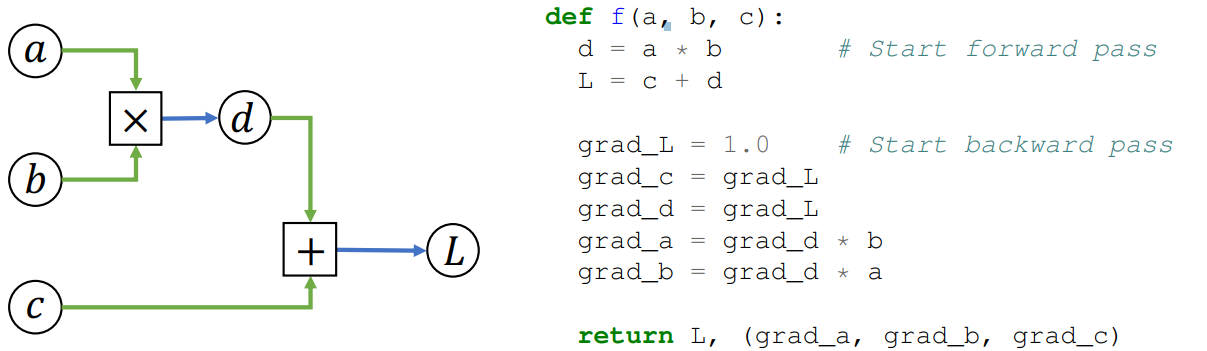

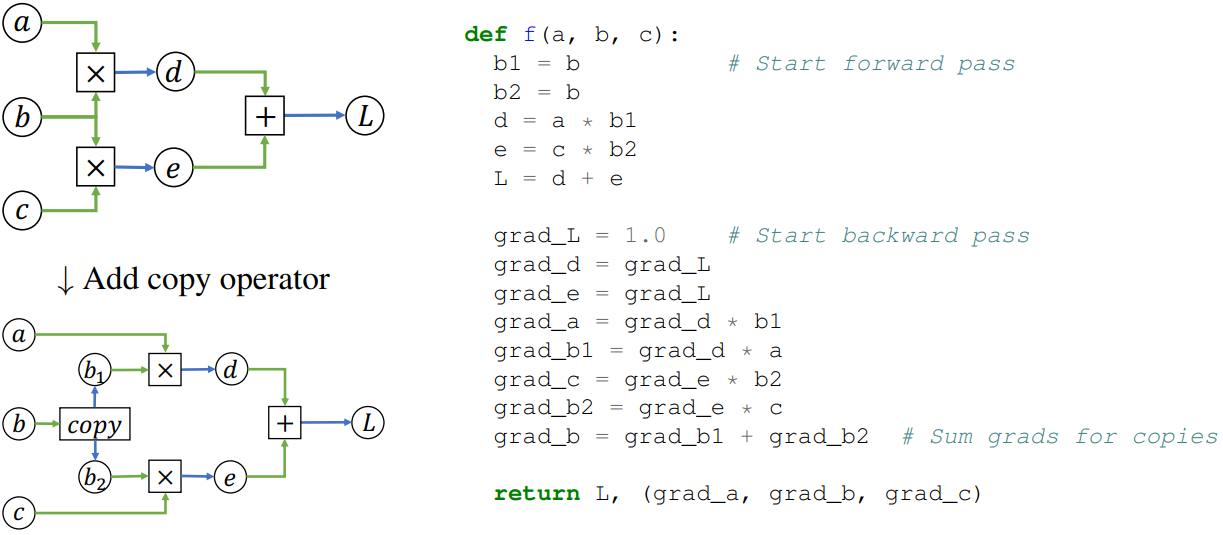

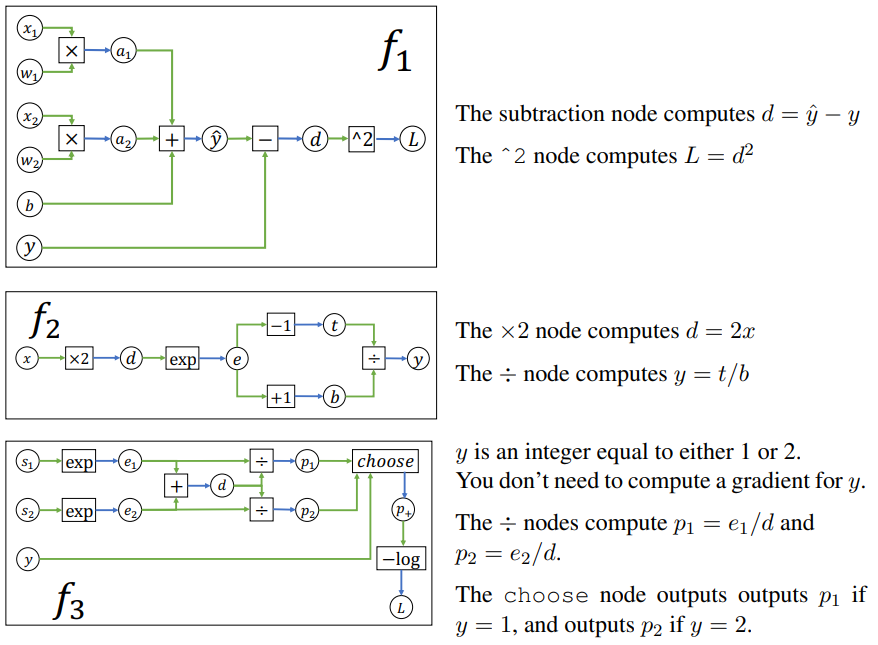

In [ ]:
import math


"""
Defines forward and backward passes through different computational graphs.

Students should complete the implementation of all functions in this file.
"""


def f1(x1, w1, x2, w2, b, y):
    """
    Computes the forward and backward pass through the computational graph f1
    from the homework PDF.

    A few clarifications about the graph:
    - The subtraction node in the graph computes d = y_hat - y
    - The ^2 node squares its input

    Inputs:
    - x1, w1, x2, w2, b, y: Python floats

    Returns a tuple of:
    - L: Python scalar giving the output of the graph
    - grads: A tuple (grad_x1, grad_w1, grad_x2, grad_w2, grad_b, grad_y)
    giving the derivative of the output L with respect to each input.
    """
    # Forward pass: compute loss
    L = None
    ###########################################################################
    # TODO: Implement the forward pass for the computational graph f1 shown   #
    # in the homework description. Store the loss in the variable L.          #
    ###########################################################################
    a1 = x1 * w1
    a2 = x2 * w2
    y_hat = a1 + a2 + b
    d = y_hat - y
    L = d**2
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    # Backward pass: compute gradients
    grad_x1, grad_w1, grad_x2, grad_w2 = None, None, None, None
    grad_b, grad_y = None, None
    ###########################################################################
    # TODO: Implement the backward pass for the computational graph f1 shown  #
    # in the homework description. Store the gradients for each input         #
    # variable in the corresponding grad variagbles defined above.            #
    ###########################################################################
    grad_L = 1.0            #  Start backward pass
    grad_d = 2 * d * grad_L
    grad_y_hat = grad_d
    grad_y = -grad_d
    grad_a1 = grad_y_hat
    grad_a2 = grad_y_hat
    grad_b = grad_y_hat
    grad_x1 = grad_a1 * w1
    grad_w1 = grad_a1 * x1
    grad_x2 = grad_a2 * w2
    grad_w2 = grad_a2 * x2
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    grads = (grad_x1, grad_w1, grad_x2, grad_w2, grad_b, grad_y)
    return L, grads


def f2(x):
    """
    Computes the forward and backward pass through the computational graph f2
    from the homework PDF.

    A few clarifications about this graph:
    - The "x2" node multiplies its input by the constant 2
    - The "+1" and "-1" nodes add or subtract the constant 1
    - The division node computes y = t / b

    Inputs:
    - x: Python float

    Returns a tuple of:
    - y: Python float
    - grads: A tuple (grad_x,) giving the derivative of the output y with
      respect to the input x
    """
    # Forward pass: Compute output
    y = None
    ###########################################################################
    # TODO: Implement the forward pass for the computational graph f2 shown   #
    # in the homework description. Store the output in the variable y.        #
    ###########################################################################
    d = x * 2
    e = math.exp(d)
    e1 = e
    e2 = e
    t = e1 - 1
    b = e2 + 1
    y = t/b

    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    # Backward pass: Compute gradients
    grad_x = None
    ###########################################################################
    # TODO: Implement the backward pass for the computational graph f2 shown  #
    # in the homework description. Store the gradients for each input         #
    # variable in the corresponding grad variagbles defined above.            #
    ###########################################################################
    grad_y = 1.0
    grad_t = grad_y * (1/b)
    grad_b = grad_y * (-t / (b**2))
    grad_e1 = grad_t
    grad_e2 = grad_b
    grad_e = grad_e1 + grad_e2
    grad_d = math.exp(d) * grad_e
    grad_x = 2 * grad_d
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    return y, (grad_x,)


def f3(s1, s2, y):
    """
    Computes the forward and backward pass through the computational graph f3
    from the homework PDF.

    A few clarifications about the graph:
    - The input y is an integer with y == 1 or y == 2; you do not need to
      compute a gradient for this input.
    - The division nodes compute p1 = e1 / d and p2 = e2 / d
    - The choose(p1, p2, y) node returns p1 if y is 1, or p2 if y is 2.

    Inputs:
    - s1, s2: Python floats
    - y: Python integer, either equal to 1 or 2

    Returns a tuple of:
    - L: Python scalar giving the output of the graph
    - grads: A tuple (grad_s1, grad_s2) giving the derivative of the output L
    with respect to the inputs s1 and s2.
    """
    assert y == 1 or y == 2
    # Forward pass: Compute loss
    L = None
    ###########################################################################
    # TODO: Implement the forward pass for the computational graph f3 shown   #
    # in the homework description. Store the loss in the variable L.          #
    ###########################################################################
    e1 = math.exp(s1)
    e2 = math.exp(s2)
    d = e1 + e2
    d1 = d
    d2 = d
    p1 = e1/d1
    p2 = e2/d2
    p_ = p1 if y == 1 else p2
    L = -math.log(p_)
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    # Backward pass: Compute gradients
    grad_s1, grad_s2 = None, None
    ###########################################################################
    # TODO: Implement the backward pass for the computational graph f3 shown  #
    # in the homework description. Store the gradients for each input         #
    # variable in the corresponding grad variables defined above. You do not #
    # need to compute a gradient for the input y since it is an integer.      #
    #                                                                         #
    # HINT: You may need an if statement to backprop through the choose node  #
    ###########################################################################


    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    grads = (grad_s1, grad_s2)
    return L, grads


def f3_y1(s1, s2):
    """
    Helper function to compute f3 in the case where y = 1

    Inputs:
    - s1, s2: Same as f3

    Outputs: Same as f3
    """
    return f3(s1, s2, y=1)


def f3_y2(s1, s2):
    """
    Helper function to compute f3 in the case where y = 2

    Inputs:
    - s1, s2: Same as f3

    Outputs: Same as f3
    """
    return f3(s1, s2, y=2)

# *Fully-Connected Neural Networks*

In [ ]:
def fc_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.

    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).

    Inputs:
    - x: A numpy array of shape (N, Din) giving input data
    - w: A numpy array of shape (Din, Dout) giving weights
    - b: A numpy array of shape (Dout,) giving biases

    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Implement the forward pass. Store the result in out.              #
    ###########################################################################
    # Compute 'out = wx + b' of shape (N, Dout)
    out = np.dot(x, w) + b
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache


def fc_backward(grad_out, cache):
    """
    Computes the backward pass for a fully-connected layer.

    Inputs:
    - grad_out: Numpy array of shape (N, Dout) giving upstream gradients
    - cache: Tuple of:
      - x: A numpy array of shape (N, Din) giving input data
      - w: A numpy array of shape (Din, Dout) giving weights
      - b: A numpy array of shape (Dout,) giving biases

    Returns a tuple of downstream gradients:
    - grad_x: A numpy array of shape (N, Din) of gradient with respect to x
    - grad_w: A numpy array of shape (Din, Dout) of gradient with respect to w
    - grad_b: A numpy array of shape (Dout,) of gradient with respect to b
    """
    x, w, b = cache
    grad_x, grad_w, grad_b = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for the fully-connected layer         #
    ###########################################################################

    # Compute gradient of input x
    grad_x = np.reshape(np.dot(grad_out, w.T), x.shape)
    # Compute gradient of weights w
    grad_w = np.dot(x.T, grad_out)
    # Compute gradient of bias b
    grad_b = np.dot(grad_out.T, np.ones(x.shape[0]))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return grad_x, grad_w, grad_b


def relu_forward(x):
    """
    Computes the forward pass for the Rectified Linear Unit (ReLU) nonlinearity

    Input:
    - x: A numpy array of inputs, of any shape

    Returns a tuple of:
    - out: A numpy array of outputs, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    # FeLU allows for positive numbers. Every value
    # below 0 is 0
    out = np.maximum(x, 0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(grad_out, cache):
    """
    Computes the backward pass for a Rectified Linear Unit (ReLU) nonlinearity

    Input:
    - grad_out: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - grad_x: Gradient with respect to x
    """
    grad_x, x = None, cache
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    # Multiply values of x greater than 0 with upstream derivatives
    grad_x = np.multiply( (x>0).astype(int), grad_out)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return grad_x


def l2_loss(x, y):
    """
    Computes the loss and gradient of L2 loss.

    loss = 0.5 * sum_i (x_i - y_i)**2 / N

    Inputs:
    - x: Input data, of shape (N, D)
    - y: Output data, of shape (N, D)

    Returns a tuple of:
    - loss: Scalar giving the loss
    - grad_x: Gradient of the loss with respect to x
    """
    N = x.shape[0]
    diff = x - y
    loss = 0.5 * np.sum(diff * diff) / N
    grad_x = diff / N
    return loss, grad_x


def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax (cross-entropy) loss function.

    Inputs:
    - x: Numpy array of shape (N, C) giving predicted class scores, where
      x[i, c] gives the predicted score for class c on input sample i
    - y: Numpy array of shape (N,) giving ground-truth labels, where
      y[i] = c means that input sample i has ground truth label c, where
      0 <= c < C.

    Returns a tuple of:
    - loss: Scalar giving the loss
    - grad_x: Numpy array of shape (N, C) giving the gradient of the loss with
      with respect to x
    """
    loss, grad_x = None, None
    ###########################################################################
    # TODO: Implement softmax loss                                            #
    ###########################################################################
    # Compute probability distribution to avoid potential overflow
    prob_dist_norminator = np.exp( x - np.max(x, axis=1, keepdims=True) )
    prob_dist_denorminator = np.sum(prob_dist_norminator, axis=1, keepdims=True)
    prob_dist = prob_dist_norminator/prob_dist_denorminator
    
    # Save number of rows of input x
    rows = x.shape[0]

    # Compute loss L
    loss = -np.log(prob_dist[np.arange(rows), y])
    loss = np.sum(loss)/rows

    # Assign probability distribution to grad_x
    grad_x = prob_dist
    # Subtract 1 from each probability distribution
    grad_x[np.arange(rows), y] -= 1
    # Divide each value by the number of rows
    grad_x /= rows
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, grad_x


def l2_regularization(w, reg):
    """
    Computes loss and gradient for L2 regularization of a weight matrix:

    loss = (reg / 2) * sum_i w_i^2

    Where the sum ranges over all elements of w.

    Inputs:
    - w: Numpy array of any shape
    - reg: float giving the regularization strength

    Returns:
    """
    loss, grad_w = None, None
    ###########################################################################
    # TODO: Implement L2 regularization.                                      #
    ###########################################################################
    # Compute loss
    loss = 0.5 * reg * np.sum(w**2)
    # Compute gradient
    grad_w = reg * w
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, grad_w

## Two-Layer Network

In [ ]:
# BLOCK NAME: Linear Classifier
# BRIEF: Contains implementation of LinearClassifier

class LinearClassifier(Classifier):
    def __init__(self, input_dim=3072, num_classes=10, weight_scale=1e-3):
        """
        Initialize a new linear classifier.

        Inputs:
        - input_dim: The number of dimensions in the input.
        - num_classes: The number of classes over which to classify
        - weight_scale: The weights of the model will be initialized from a
          Gaussian distribution with standard deviation equal to weight_scale.
          The bias of the model will always be initialized to zero.
        """
        self.W = weight_scale * np.random.randn(input_dim, num_classes)
        self.b = np.zeros(num_classes)

    def parameters(self):
        params = {
            'W': self.W,
            'b': self.b,
        }
        return params

    def forward(self, X):
        scores, cache = fc_forward(X, self.W, self.b)
        return scores, cache

    def backward(self, grad_scores, cache):
        grad_X, grad_W, grad_b = fc_backward(grad_scores, cache)
        grads = {
            'W': grad_W,
            'b': grad_b,
        }
        return grads

In [ ]:
class TwoLayerNet(Classifier):
    """
    A neural network with two layers, using a ReLU nonlinearity on its one
    hidden layer. That is, the architecture should be:

    input -> FC layer -> ReLU layer -> FC layer -> scores
    """
    def __init__(self, input_dim=3072, num_classes=10, hidden_dim=512,
                 weight_scale=1e-3):
        """
        Initialize a new two layer network.

        Inputs:
        - input_dim: The number of dimensions in the input.
        - num_classes: The number of classes over which to classify
        - hidden_dim: The size of the hidden layer
        - weight_scale: The weight matrices of the model will be initialized
          from a Gaussian distribution with standard deviation equal to
          weight_scale. The bias vectors of the model will always be
          initialized to zero.
        """
        #######################################################################
        # TODO: Initialize the weights and biases of a two-layer network.     #
        #######################################################################
        # First weight matrix applied between input layer and hidden layer 
        # with shape(input_dim, hidden_dim)
        self.W1 = weight_scale * np.random.randn(input_dim, hidden_dim)
        # First bias vector initialized to zero with shape(hidden_dim)
        self.b1 = np.zeros(hidden_dim)
        # Second weight matrix applied between hidden layer and output scores
        # with shape(hidden_dim, num_classes)
        self.W2 = weight_scale * np.random.randn(hidden_dim, num_classes)
        # Second bias vector initialized to zero with shape(num_classes)
        self.b2 = np.zeros(num_classes)
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################

    def parameters(self):
        #######################################################################
        # TODO: Build a dict of all learnable parameters of this model.       #
        #######################################################################
        params = {
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2,
        }
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
        return params

    def forward(self, X):
        scores, cache = None, None
        #######################################################################
        # TODO: Implement the forward pass to compute classification scores   #
        # for the input data X. Store into cache any data that will be needed #
        # during the backward pass.                                           #
        #######################################################################
        # Compute 'y = wx + b' for input, W1 and b1
        scores, cache_in = fc_forward(X, self.W1, self.b1)
        # Compute ReLU forward pass
        out, cache_relu = relu_forward(scores)
        # Compute 'y = wx + b' for hidden layer, W2 and b2
        scores, cache_h = fc_forward(out, self.W2, self.b2)
        # Save values of fc, relu, and hidden cache
        cache = (cache_in, cache_relu, cache_h)
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
        return scores, cache

    def backward(self, grad_scores, cache):
        grads = None
        #######################################################################
        # TODO: Implement the backward pass to compute gradients for all      #
        # learnable parameters of the model, storing them in the grads dict   #
        # above. The grads dict should give gradients for all parameters in   #
        # the dict returned by model.parameters().                            #
        #######################################################################
        # Unpack caches
        cache_in, cache_relu, cache_h = cache

        # Compute downstream gradients in backpropagation from 2nd layer
        # using cache from 2nd layer in forward pass
        grad_x2, grad_w2, grad_b2 = fc_backward(grad_scores, cache_h)
        # Add product of reg and weight matrix to weight gradient
        grad_w2 += 0.0 * self.W2

        # Compute ReLU backward pass using ReLU cache from relu_forward
        grad_relu = relu_backward(grad_x2, cache_relu)

        # Compute downstream gradients in backpropagation from 1st layer
        grad_x1, grad_w1, grad_b1 = fc_backward(grad_relu, cache_in)
        # Add product of reg and weight matrix to weight gradient
        grad_w1 += 0.0 * self.W1

        # Store gradients in gradient dictionary
        grads = {
            'W1': grad_w1,
            'b1': grad_b1,
            'W2': grad_w2,
            'b2': grad_b2,
        }
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
        return grads

## Training Two-Layer Networks

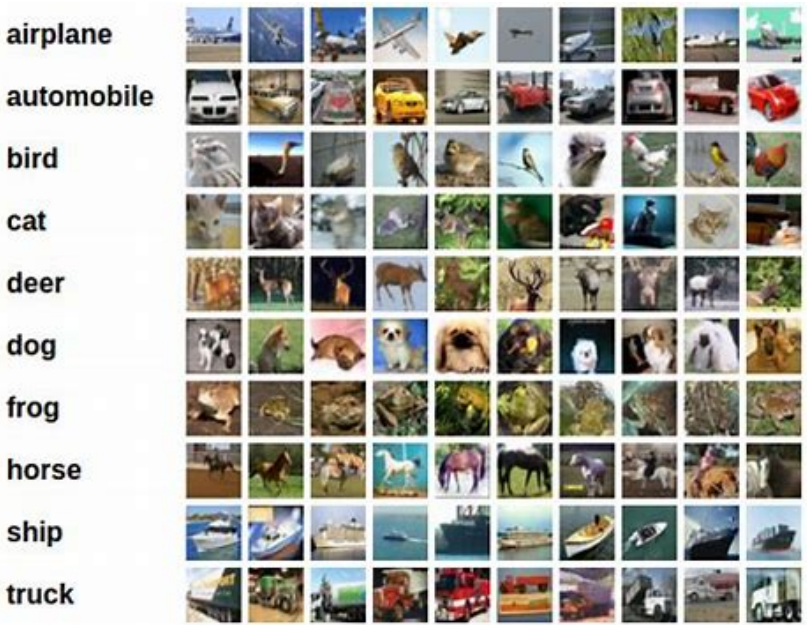

You can use the script below to download and unpack the CIFAR10 dataset.

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2022-12-01 23:47:57--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  50.3MB/s    in 3.6s    

2022-12-01 23:48:02 (45.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
_CIFAR_DIR = 'cifar-10-batches-py'

In [ ]:
# BLOCK NAME: UTILITY METHODS TASK 5
# BRIEF: Contains methods for task 5. Make sure you run it before your implementation

class DataSampler:
    """
    A helper class to iterate through data and labels in minibatches.

    Example usage:

    X = torch.randn(N, D)
    y = torch.randn(N)
    sampler = DataSampler(X, y, batch_size=64)
    for X_batch, y_batch in sampler:
        print(X_batch.shape)  # (64, D)
        print(y_batch.shape)  # (64,)

    The loop will run for exactly one epoch over X and y -- that is, each entry
    will appear in exactly one minibatch. If the batch size does not evenly
    divide the number of elements in X and y then the last batch will be have
    fewer than batch_size elements.

    You can use a DataSampler object to iterate through the data as many times
    as you want. Each epoch will iterate through the data in a random order.
    """
    def __init__(self, X, y, batch_size):
        """
        Create a new DataSampler.

        Inputs:
        - X: Numpy array of shape (N, D)
        - y: Numpy array of shape (N,)
        - batch_size: Integer giving the number of elements for each minibatch
        """
        self.X = X
        self.y = y
        self.batch_size = batch_size

    def __iter__(self):
        """
        Iterate through the data. This returns a generator which yields tuples:
        - X_batch: Numpy array of shape (batch_size, D)
        - y_batch: Numpy array of shape (batch_size,)

        Note that when the batch size does not divide the number of elements N,
        then the last minibatch will have fewer than batch_size elements.
        """
        N = self.X.shape[0]
        perm = np.random.permutation(N)
        start, stop = 0, self.batch_size
        while start < N:
            idx = perm[start:stop]
            X_batch = self.X[idx]
            y_batch = self.y[idx]
            start += self.batch_size
            stop += self.batch_size
            yield X_batch, y_batch

    def __len__(self):
        """ Get the number of minibatches in an epoch. """
        return self.X.shape[0] // self.batch_size


def load_cifar10(data_dir=_CIFAR_DIR, num_train=10000, num_val=5000,
                 num_test=10000, seed=442):
    """
    Load and preprocess CIFAR-10 data. More specifically:

    (1) Load the raw data from disk
    (2) Shuffle the train and test sets
    (3) Subsample the training set to create train and val sets
    (4) Subsample the test set
    (5) Preprocess all images to be float32 in the range [0, 1]

    Inputs:
    - data_dir: Path to the cifar-10-batches-py directory where the CIFAR-10
      dataset has been downloaded
    - num_train: Size of training set after subsampling
    - num_val: Size of validation set after subsampling
    - num_test: Size of test set after subsampling
    - seed: Random seed to use when shuffling data

    Returns a dictionary with keys and values:
    - X_train: float32 array of shape (num_train, 3072)
    - X_val: float32 array of shape (num_val, 3072)
    - X_test: float32 array of shape (num_test, 3072)
    - y_train: int64 array of shape (num_train,) in the range [0, 10)
    - y_val: int64 array of shape (num_val,) in the range [0, 10)
    - y_test: int64 array of shape (num_test,) in the range [0, 10)
    """
    if not os.path.isdir(data_dir):
        print(f'Directory {data_dir} not found.')
        print('Did you run download_cifar.sh?')
        raise ValueError

    # Load training data
    X_train, y_train = [], []
    for i in [1, 2, 3, 4, 5]:
        filename = os.path.join(data_dir, f'data_batch_{i}')
        with open(filename, 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
        X_train.append(batch['data'])
        y_train.append(batch['labels'])
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Load test data
    filename = os.path.join(data_dir, 'test_batch')
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
    X_test = batch['data']
    y_test = np.asarray(batch['labels'])

    # Shuffle the training and test sets
    rng = np.random.default_rng(seed)
    idx = rng.permutation(X_train.shape[0])
    X_train = X_train[idx]
    y_train = y_train[idx]
    idx = rng.permutation(X_test.shape[0])
    X_test = X_test[idx]
    y_test = y_test[idx]

    # Split training set into train and val
    if num_train + num_val > X_train.shape[0]:
        msg = (f'Got num_train = {num_train}, num_val = {num_val}; '
                f'must have num_train + num_val <= {X_train.shape[0]}')
        raise ValueError(msg)
    if num_test > X_test.shape[0]:
        msg = (f'Got num_test = {num_test}; '
                f'must have num_test < {X_test.shape[0]}')
        raise ValueError(msg)
    X_train_orig = X_train
    y_train_orig = y_train
    X_train = X_train_orig[:num_train]
    y_train = y_train_orig[:num_train]
    X_val = X_train_orig[num_train:(num_train + num_val)]
    y_val = y_train_orig[num_train:(num_train + num_val)]
    X_test = X_test[:num_test]
    y_test = y_test[:num_test]

    # Preprocess images: Convert to float in the range [0, 1]
    X_train = X_train.astype(np.float32) / 255.0
    X_val = X_val.astype(np.float32) / 255.0
    X_test = X_test.astype(np.float32) / 255.0

    data = {
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val,
        'X_test': X_test,
        'y_test': y_test,
    }
    return data

class Optimizer:
    """
    Base class for implementing optimization algorithms that can be used to
    optimize the parameters of Classifer instances.

    This base class should not be used directly; instead subclasses should
    override the step method.

    An Optimizer object is expected to be used like this:

    model = LinearClassifier()  # Or another Classifier subclass
    optimizer = Optimizer(model.parameters(), [other arguments])
    while not_done:
      # Run a forward and backward pass of the model to get a grads dict
      grads = model.backward() # Compute gradient of loss w/respect to params
      optimizer.step(grads)    # Update the parameters of the model in-place
    """
    def __init__(self, params):
        """
        Create a new Optimizer object. Subclasses should implement their own
        initializer that takes any required hyperparameters.
        """
        raise NotImplementedError

    def step(self, grads):
        """
        Update the parameters of the model. Subclasses should override this.

        IMPORTANT: The step method must update the parameters of the model
        in-place -- it should not replace any numpy arrays in params.

        For example, this is an in-place operation and is ok:
        params[k] -= learning_rate * grads[k]

        This is NOT an in-place operation, and is NOT OK:
        params[k] = params[k] - learning_rate * grads[k]
        """
        raise NotImplementedError


class SGD(Optimizer):
    """
    Implements stochastic gradient descent, which updates parameters according
    to the learning rule

    p -= learning_rate * g

    where p is a parameter and g is the gradient of the loss with respect to
    the parameter.
    """
    def __init__(self, params, learning_rate):
        self.params = params
        self.learning_rate = learning_rate

    def step(self, grads):
        for k, g in grads.items():
            self.params[k] -= self.learning_rate * g

data = load_cifar10()
for k, v in data.items():
    print(k, v.shape, v.dtype)

X_train (10000, 3072) float32
y_train (10000,) int64
X_val (5000, 3072) float32
y_val (5000,) int64
X_test (10000, 3072) float32
y_test (10000,) int64


Block above implements a training loop. We’ve already implemented a lot of the logic here for you. You don’t need to do anything with the above block of code, but you can look through them to see how they work:

• There is a function `load_cifar10` to load and preprocess the `CIFAR10` dataset, as well as a `DataSampler` object for iterating over the dataset in minibatches.

• Utility code block above defines an Optimizer interface for objects that implement optimization algorithms, and implements a subclass SGD which implements basic stochastic gradient descent with a constant learning rate.


You need to implement the training step function in the block below.


This function inputs the model, a minibatch of data, and the regularization strength; it computes a forward and backward pass through the model and returns both the loss and the gradient of the loss with respect to
the model parameters. The loss should be the sum of two terms:

(a) A data loss term, which is the softmax loss between the model’s predicted scores and the ground-truth image labels

(b) A regularization loss term, which penalizes the L2 norm of the weight matrices of all the fully-connected layers of the model. You should not apply L2 regularization to the biases.


Now it’s time to train your model!

<font color='red'>[CODE]</font> **Task 5(a): implement the training step function in the block below.** (10 pts)

After Implementation, run the code block to train a two-layer network on the CIFAR-10 dataset. The block will print out training losses and train and val set accuracies as it trains. After training concludes, the script will also mke a plot of the training losses as well as the training and validation-set accuracies of the model during training; by default this will be saved in a file plot.pdf in root of your project directory, but this can be customized by changing the `PLOT_SAVE_DIR` varaible.

In [ ]:
# BLOCK NAME: Train
# BRIEF: Implements training mechanism

import numpy as np
import matplotlib.pyplot as plt

PLOT_SAVE_DIR = source
CHECKPOINT_FILENAME = os.path.join(source ,'checkpoint.pkl')
PRINT_EVERY = 25

def train(args):
    # How much data to use for training
    num_train = 45000

    # Model architecture hyperparameters.
    hidden_dim = 150

    # Optimization hyperparameters.
    batch_size = 200
    num_epochs = 10
    learning_rate = 5e-2
    reg = 0.0

    ###########################################################################
    # TODO: Set hyperparameters for training your model. You can change any   #
    # of the hyperparameters above.                                           #
    ###########################################################################

    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

    data = load_cifar10(num_train=num_train)
    train_sampler = DataSampler(data['X_train'], data['y_train'], batch_size)
    val_sampler = DataSampler(data['X_val'], data['y_val'], batch_size)

    # Set up the model and optimizer
    model = TwoLayerNet(hidden_dim=hidden_dim)
    optimizer = SGD(model.parameters(), learning_rate=learning_rate)

    stats = {
        't': [],
        'loss': [],
        'train_acc': [],
        'val_acc': [],
    }

    for epoch in range(1, num_epochs + 1):
        print(f'Starting epoch {epoch} / {num_epochs}')
        for i, (X_batch, y_batch) in enumerate(train_sampler):
            loss, grads = training_step(model, X_batch, y_batch, reg)
            optimizer.step(grads)
            if i % PRINT_EVERY == 0:
                print(f'  Iteration {i} / {len(train_sampler)}, loss = {loss}')
            stats['t'].append(i / len(train_sampler) + epoch - 1)
            stats['loss'].append(loss)

        print('Checking accuracy')
        train_acc = check_accuracy(model, train_sampler)
        print(f'  Train: {train_acc:.2f}')
        val_acc = check_accuracy(model, val_sampler)
        print(f'  Val:   {val_acc:.2f}')
        stats['train_acc'].append(train_acc)
        stats['val_acc'].append(val_acc)

    print(f'Saving plot to {PLOT_SAVE_DIR}')
    plot_stats(stats, PLOT_SAVE_DIR)
    print(f'Saving model checkpoint to {CHECKPOINT_FILENAME}')
    model.save(CHECKPOINT_FILENAME)


def training_step(model, X_batch, y_batch, reg):
    """
    Compute the loss and gradients for a single training iteration of a model
    given a minibatch of data. The loss should be a sum of a cross-entropy loss
    between the model predictions and the ground-truth image labels, and
    an L2 regularization term on all weight matrices in the fully-connected
    layers of the model. You should not regularize the bias vectors.

    Inputs:
    - model: A Classifier instance
    - X_batch: A numpy array of shape (N, D) giving a minibatch of images
    - y_batch: A numpy array of shape (N,) where 0 <= y_batch[i] < C is the
      ground-truth label for the image X_batch[i]
    - reg: A float giving the strength of L2 regularization to use.

    Returns a tuple of:
    - loss: A float giving the loss (data loss + regularization loss) for the
      model on this minibatch of data
    - grads: A dictionary giving gradients of the loss with respect to the
      parameters of the model. In particular grads[k] should be the gradient
      of the loss with respect to model.parameters()[k].
    """
    loss, grads = None, None
    ###########################################################################
    # TODO: Compute the loss and gradient for one training iteration.         #
    ###########################################################################
    # Compute model's forward pass
    scores, cache = model.forward(X_batch)

    # Compute softmax loss
    data_loss, grad_softmax = softmax_loss(scores, y_batch)

    # Compute regularization loss
    reg_loss1, _ = l2_regularization(model.W1, reg)
    reg_loss2, _ = l2_regularization(model.W2, reg)
    reg_loss = reg_loss1 + reg_loss2

    # Compute loss
    loss = data_loss + reg_loss

    # Compute grads
    grads = model.backward(grad_softmax, cache)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, grads


def plot_stats(stats, filename):
    plt.subplot(1, 2, 1)
    plt.plot(stats['t'], stats['loss'], 'o', alpha=0.5, ms=4)
    plt.title('Loss')
    plt.xlabel('Epoch')
    loss_xlim = plt.xlim()

    plt.subplot(1, 2, 2)
    epoch = np.arange(1, 1 + len(stats['train_acc']))
    plt.plot(epoch, stats['train_acc'], '-o', label='train')
    plt.plot(epoch, stats['val_acc'], '-o', label='val')
    plt.xlim(loss_xlim)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.gcf().set_size_inches(12, 4)
    plt.savefig(filename, bbox_inches='tight')
    plt.clf()

two_net = TwoLayerNet()
two_net = train(two_net)

Starting epoch 1 / 10
  Iteration 0 / 225, loss = 2.302565525559329
  Iteration 25 / 225, loss = 2.302105651785961
  Iteration 50 / 225, loss = 2.297465708184027
  Iteration 75 / 225, loss = 2.2802973302855167
  Iteration 100 / 225, loss = 2.2434388473574547
  Iteration 125 / 225, loss = 2.1778097056839583
  Iteration 150 / 225, loss = 2.1467112573879534
  Iteration 175 / 225, loss = 2.031157962413965
  Iteration 200 / 225, loss = 2.1411736704623308
Checking accuracy
  Train: 19.98
  Val:   20.00
Starting epoch 2 / 10
  Iteration 0 / 225, loss = 2.1188545985351586
  Iteration 25 / 225, loss = 2.0677855302394725
  Iteration 50 / 225, loss = 2.063025728566726
  Iteration 75 / 225, loss = 1.958431896897381
  Iteration 100 / 225, loss = 1.9764198590080042
  Iteration 125 / 225, loss = 1.9779243280250345
  Iteration 150 / 225, loss = 1.9030216171523373
  Iteration 175 / 225, loss = 1.9613318018554105
  Iteration 200 / 225, loss = 1.972477722802322
Checking accuracy
  Train: 30.94
  Val:   3

<Figure size 864x288 with 0 Axes>

You should see a plot that looks like this:

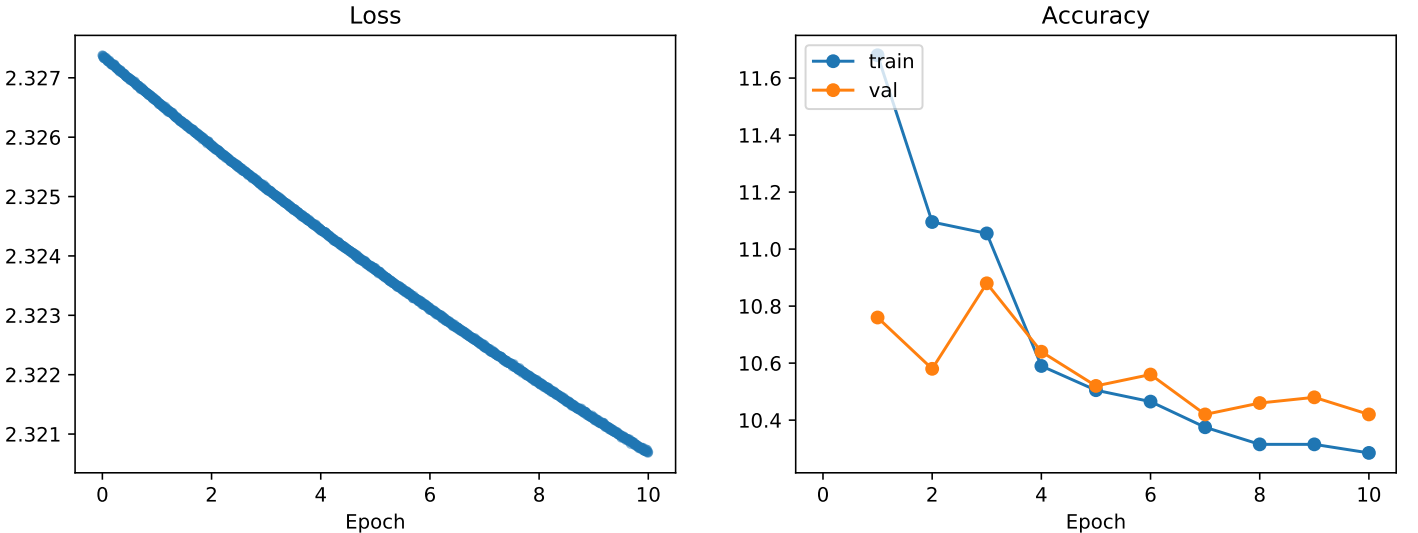

Unfortunately, it seems that your model is not training very effectively – the training loss has not decreased much from its initial value of ≈ 2.3, and the training and validation accuracies are very close to 10% which is what we would expect from a model that randomly guesses a category label for each input.

You will need to tune the hyperparameters of your model in order to improve it. **[TODO: Shivang]** Try changing the hyperparameters in the code block . You can consider changing any of the following hyperparameters:

• num train: The number of images to use for training

• hidden dim: The width of the hidden layer of the model

• batch size: The number of examples to use in each minibatch during SGD

• num epochs: How long to train the model. An epoch is a single pass through the training set.

• learning rate: The learning rate to use for SGD

• reg: The strength of the L2 regularization term

You should tune the hyperparameters and train a model that achieves at least 40% on the validation set. After tuning your model, run your best model exactly once on the test set using the function `test` function below.

In [ ]:
# BLOCK NAME: Test
# BRIEF: Implements the test mechanism for your model

CHECKPOINT_FILENAME = os.path.join(source ,'checkpoint.pkl') # Modify this variable if your checkpoint is not at the root dir of the project folder
BATCH_SIZE = 128


def test():
    data = load_cifar10()
    sampler = DataSampler(data['X_test'], data['y_test'], BATCH_SIZE)
    print(f'Loading model from {CHECKPOINT_FILENAME}')
    model = TwoLayerNet.load(CHECKPOINT_FILENAME)
    acc = check_accuracy(model, sampler)
    print(f'Test-set accuracy: {acc:.2f}')

test()

NameError: ignored

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 5(b): Please include the loss / accuracy plot for your best model in your submission folder, describe the hyperparameter settings you used in the answer space below, and give the final test-set performance of your model (accuracy on the test set).** (5 pts)

*Answer*

num_train = 45000

hidden_dim = 150

batch_size = 200

num_epochs = 50

learning_rate = 5e-2

reg = 0.0

**Final Test-set Performance = 49.5%**

You may not need to change all of the hyperparameters; some are fine at their default values. Your model shouldn’t take an excessive amount of time to train. For reference, our hyperparameter settings achieve ≈ 45% accuracy on the validation set in ≈ 5 minutes of training on a 2019 MacBook Pro.


To gain more experience with hyperparameters, you should also tune the hyperparameters to find a setting that results in an overfit model that achieves ≥ 75% accuracy on the training set.

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 5(c): In your submission, include the loss / accuracy plot for your overfit model and describe the hyperparameter settings you used.** (5 pts)

*Note:* As above, this should not take an excessive amount of training time – we are able to train an overfit model that achieves ≈ 80% accuracy on the training set within about a minute of training.

**HINT**: It’s easier to overfit a smaller training set.

*Answer*

num_train = 5000

hidden_dim = 150

batch_size = 50

num_epochs = 100

learning_rate = 5e-2

reg = 0.0

**Train-set Performance = 85.7%**

**Final Test-set Performance = 40.2%**

# *Semantic Segmentation*




In [ ]:
N_CLASS=5
##############################################################################
# TODO: Change data_range so that train_data and val_data splits the 906     #
# samples under "train" folder. You can decide how to split.                 #
#                                                                            # 
# TODO: Adjust batch_size for loaders                                        #
##############################################################################
train_data = FacadeDataset(flag='train', data_range=(0,856), onehot=False)
train_loader = DataLoader(train_data, batch_size=10)
val_data = FacadeDataset(flag='train', data_range=(856,906), onehot=False)
val_loader = DataLoader(val_data, batch_size=10)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
test_data = FacadeDataset(flag='test_dev', data_range=(0,114), onehot=False)
test_loader = DataLoader(test_data, batch_size=1)

# ap_loader for calculating Average Precision
ap_data = FacadeDataset(flag='test_dev', data_range=(0,114), onehot=True)
ap_loader = DataLoader(ap_data, batch_size=1)

load train dataset start
    from: ./facades/
    range: [0, 856)
load dataset done
load train dataset start
    from: ./facades/
    range: [856, 906)
load dataset done
load test_dev dataset start
    from: ./facades/
    range: [0, 114)
load dataset done
load test_dev dataset start
    from: ./facades/
    range: [0, 114)
load dataset done


## Model

[1] O. Ronneberger, P. Fischer, and T. Brox, “U-net:  Convolutional networks for biomedical image seg-mentation,”ArXiv, vol. abs/1505.04597, 2015

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.n_class = N_CLASS
    ########################################################################
    # TODO: Implement a sematic segmentation model                         #
    ########################################################################
    self.layers = nn.Sequential(
        # Conv-ReLU-Conv-ReLU that goes from 3 -> 64 -> 64 ( H x W )
        nn.Conv2d(3, 64, kernel_size=11, stride=1, padding=5),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(64, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),
        nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(64, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),

        # Maxpool (nn.MaxPool2d) to reduce the size of the feature map by half ( H/2 x W/2 )
        nn.MaxPool2d(2, 2),

        # Conv-ReLU-Conv-ReLU that goes from 64 -> 128 -> 128 ( H/2 x W/2 )
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(128, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(128, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),

        # Maxpool (nn.MaxPool2d) to reduce the size of the feature map by half ( H/4 x W/4 )
        nn.MaxPool2d(2, 2),

        # Conv that goes from 128 -> 128 ( H/4 x W/4 )
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(128, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),
        
        # Upsample (nn.Upsample) to increase of size of the feature map by two ( H/2 x W/2 )
        nn.Upsample(scale_factor=2),

        # Conv-ReLU-Conv-ReLU that goes from 128 -> 64 -> 64 ( H/2 x W/2 )
        nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(64, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(64, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),

        # Upsample (nn.Upsample) to increase of size of the feature map by two ( H x W )
        nn.Upsample(scale_factor=2),

        # Conv-ReLU-Conv-ReLU that goes from 64 -> 64 -> 5 ( H x W )
        nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
        nn.ReLU(inplace= True),
        nn.BatchNorm2d(64, eps=5e-2, momentum=0.1, affine=True, track_running_stats=True),
        nn.Conv2d(64, self.n_class, kernel_size=1, stride=1, padding=0),
        nn.ReLU(inplace= True)
        )
    ########################################################################
    #                             END OF YOUR CODE                         #
    ########################################################################

  def forward(self, x):
    ########################################################################
    # TODO: Implement the forward pass                                     #
    ########################################################################
    x = self.layers(x)
    ########################################################################
    #                             END OF YOUR CODE                         #
    ########################################################################
    return x

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 6(b):** Write down the detailed architecture of your model. Include information on hyperparameters chosen for training and show a plot showing both training and validation loss across iterations. (10 pts)




Model Architecture:

![](https://drive.google.com/uc?id=1-b49B7r4rV-q28K8SoPwvzJ1UfMm3YdC)

![](https://drive.google.com/uc?id=10kSzIBUhQnOmd9ERSsx6RjM_qA4uow2H)
![](https://drive.google.com/uc?id=10kkUXjuQhZPvTMClz9WH54M-VV1ocRKK)
![](https://drive.google.com/uc?id=10lNfOyGwuAunhxM-sICjODZQhFruk-qd)

[View all results](https://drive.google.com/drive/folders/1rSeCJW0kks3BZS-ZKvWNur7I9ldjcKcZ?usp=share_link)
